In [1]:
from traffic.core import Traffic
from pyproj import Geod
import numpy as np
import pandas as pd

In [2]:
t = Traffic.from_file("../deep_traffic_generation/data/traffic.pkl")
t

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
2FPLF_000,200
SWR2291_12969,200
SWR2291_12976,200
SWR2291_12975,200
SWR2291_12974,200
SWR2291_12973,200
SWR2291_12972,200
SWR2291_12971,200
SWR2291_12970,200


/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


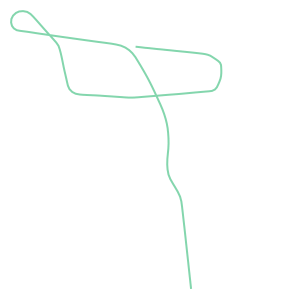

In [3]:
flight = t[1]
flight

In [4]:
flight.data.head()

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,altitude,callsign,geoaltitude,groundspeed,icao24,lastseen,latitude,longitude,onground,...,distance,flight_id,runway,initial_bearing,initial_flow,simple,track_unwrapped,x,y,timedelta
0,2019-10-02 15:02:01+00:00,21425.0,2KYCM,21775.0,338.812340,43ec4d,2019-10-02 15:34:36+00:00,46.819519,8.782631,False,...,39.893744,2KYCM_001,28,346.23489,312-354,False,354.070658,483418.092407,5.185231e+06,0.0
1,2019-10-02 15:02:10+00:00,21300.0,2KYCM,21575.0,336.823105,43ec4d,2019-10-02 15:34:36+00:00,46.833801,8.780488,False,...,39.040270,2KYCM_001,28,346.23489,312-354,False,354.035513,483258.997359,5.186818e+06,9.0
2,2019-10-02 15:02:19+00:00,21125.0,2KYCM,21475.0,332.845022,43ec4d,2019-10-02 15:34:36+00:00,46.847658,8.778351,False,...,38.211995,2KYCM_001,28,346.23489,312-354,False,353.963963,483100.367396,5.188358e+06,18.0
3,2019-10-02 15:02:27+00:00,21000.0,2KYCM,21300.0,331.850583,43ec4d,2019-10-02 15:34:36+00:00,46.859573,8.776535,False,...,37.500318,2KYCM_001,28,346.23489,312-354,False,353.963963,482965.718384,5.189683e+06,26.0
4,2019-10-02 15:02:36+00:00,20875.0,2KYCM,21175.0,332.845022,43ec4d,2019-10-02 15:34:36+00:00,46.873309,8.774414,False,...,36.679993,2KYCM_001,28,346.23489,312-354,False,353.963963,482808.398037,5.191210e+06,35.0


### Reconstruction from start

In [5]:
gs = flight.data.groundspeed.values
az = flight.data.track_unwrapped.values
lat1 = flight.data.latitude.values
lon1 = flight.data.longitude.values

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df = pd.DataFrame({
    "timestamp": flight.data.timestamp.values,
    "az": az,
    "gs": gs,
    "latitude": None,
    "longitude": None,
})
df

,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,354.070658,338.812340,None,None
1,2019-10-02 15:02:10,354.035513,336.823105,None,None
2,2019-10-02 15:02:19,353.963963,332.845022,None,None
3,2019-10-02 15:02:27,353.963963,331.850583,None,None
4,2019-10-02 15:02:36,353.963963,332.845022,None,None
...,...,...,...,...,...
195,2019-10-02 15:30:43,277.236922,127.011701,None,None
196,2019-10-02 15:30:52,276.241914,129.757354,None,None
197,2019-10-02 15:31:00,276.736011,127.882648,None,None
198,2019-10-02 15:31:09,276.842773,125.896674,None,None


In [7]:
df.loc[0, "latitude"] = lat1[0]
df.loc[0, "longitude"] = lon1[0]
df

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,354.070658,338.812340,46.819519,8.782631
1,2019-10-02 15:02:10,354.035513,336.823105,None,None
2,2019-10-02 15:02:19,353.963963,332.845022,None,None
3,2019-10-02 15:02:27,353.963963,331.850583,None,None
4,2019-10-02 15:02:36,353.963963,332.845022,None,None
...,...,...,...,...,...
195,2019-10-02 15:30:43,277.236922,127.011701,None,None
196,2019-10-02 15:30:52,276.241914,129.757354,None,None
197,2019-10-02 15:31:00,276.736011,127.882648,None,None
198,2019-10-02 15:31:09,276.842773,125.896674,None,None


In [8]:
geod = Geod(ellps="WGS84")

for i in range(1, len(df)):
    lon1 = df.loc[i-1, "longitude"]
    lat1 = df.loc[i-1, "latitude"]
    az = df.loc[i-1, "az"]
    gs = df.loc[i-1, "gs"]
    delta_time = (df.loc[i, "timestamp"] - df.loc[i-1, "timestamp"]).total_seconds()
    lon2, lat2, _ = geod.fwd(lon1, lat1, az, gs*0.99*delta_time*(1852/3600))
    df.loc[i, "longitude"] = lon2
    df.loc[i, "latitude"] = lat2

df

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,354.070658,338.812340,46.819519,8.782631
1,2019-10-02 15:02:10,354.035513,336.823105,46.833414,8.780529
2,2019-10-02 15:02:19,353.963963,332.845022,46.847227,8.778425
3,2019-10-02 15:02:27,353.963963,331.850583,46.859359,8.776555
4,2019-10-02 15:02:36,353.963963,332.845022,46.872966,8.774457
...,...,...,...,...,...
195,2019-10-02 15:30:43,277.236922,127.011701,47.454213,8.613135
196,2019-10-02 15:30:52,276.241914,129.757354,47.454873,8.605476
197,2019-10-02 15:31:00,276.736011,127.882648,47.455390,8.598506
198,2019-10-02 15:31:09,276.842773,125.896674,47.456008,8.590786


In [9]:
from traffic.core import Flight

df = df.assign(
    flight_id = 0,
    callsign=0,
    icao24=0,
)

f = Flight(df)
t = Traffic.from_flights([f, flight])
t

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
0,200
2KYCM_001,200


/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


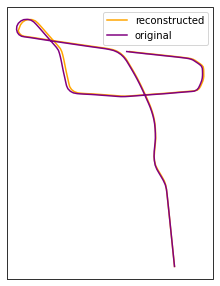

In [10]:
import matplotlib.pyplot as plt

from traffic.core.projection import EuroPP

fig, ax = plt.subplots(1, figsize=(5, 5), subplot_kw=dict(projection=EuroPP()))
f.plot(ax, c="orange", label="reconstructed")
flight.plot(ax, c="purple", label="original")
ax.legend()

### Reconstruction from end

In [11]:
gs = flight.data.groundspeed.values[::-1]
az = flight.data.track_unwrapped.values[::-1]
lat1 = flight.data.latitude.values
lon1 = flight.data.longitude.values

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df = pd.DataFrame({
    "timestamp": flight.data.timestamp.values,
    "az": az,
    "gs": gs,
    "latitude": None,
    "longitude": None,
})
df

,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,276.340192,126.775282,None,None
1,2019-10-02 15:02:10,276.842773,125.896674,None,None
2,2019-10-02 15:02:19,276.736011,127.882648,None,None
3,2019-10-02 15:02:27,276.241914,129.757354,None,None
4,2019-10-02 15:02:36,277.236922,127.011701,None,None
...,...,...,...,...,...
195,2019-10-02 15:30:43,353.963963,332.845022,None,None
196,2019-10-02 15:30:52,353.963963,331.850583,None,None
197,2019-10-02 15:31:00,353.963963,332.845022,None,None
198,2019-10-02 15:31:09,354.035513,336.823105,None,None


In [13]:
df.loc[0, "latitude"] = lat1[199]
df.loc[0, "longitude"] = lon1[199]
df

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,276.340192,126.775282,47.456543,8.570984
1,2019-10-02 15:02:10,276.842773,125.896674,None,None
2,2019-10-02 15:02:19,276.736011,127.882648,None,None
3,2019-10-02 15:02:27,276.241914,129.757354,None,None
4,2019-10-02 15:02:36,277.236922,127.011701,None,None
...,...,...,...,...,...
195,2019-10-02 15:30:43,353.963963,332.845022,None,None
196,2019-10-02 15:30:52,353.963963,331.850583,None,None
197,2019-10-02 15:31:00,353.963963,332.845022,None,None
198,2019-10-02 15:31:09,354.035513,336.823105,None,None


In [14]:
geod = Geod(ellps="WGS84")

for i in range(1, len(df)):
    lon1 = df.loc[i-1, "longitude"]
    lat1 = df.loc[i-1, "latitude"]
    az = df.loc[i-1, "az"] - 180
    gs = df.loc[i-1, "gs"]
    delta_time = (df.loc[i, "timestamp"] - df.loc[i-1, "timestamp"]).total_seconds()
    lon2, lat2, _ = geod.fwd(lon1, lat1, az, gs*0.99*delta_time*(1852/3600))
    df.loc[i, "longitude"] = lon2
    df.loc[i, "latitude"] = lat2

df

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,276.340192,126.775282,47.456543,8.570984
1,2019-10-02 15:02:10,276.842773,125.896674,47.455966,8.578643
2,2019-10-02 15:02:19,276.736011,127.882648,47.455347,8.586241
3,2019-10-02 15:02:27,276.241914,129.757354,47.454797,8.593103
4,2019-10-02 15:02:36,277.236922,127.011701,47.454215,8.600944
...,...,...,...,...,...
195,2019-10-02 15:30:43,353.963963,332.845022,46.885588,8.767737
196,2019-10-02 15:30:52,353.963963,331.850583,46.871941,8.769842
197,2019-10-02 15:31:00,353.963963,332.845022,46.859846,8.771706
198,2019-10-02 15:31:09,354.035513,336.823105,46.846198,8.773810


In [15]:
# reverse columns back to normal
df["az"] = df["az"].values[::-1]
df["gs"] = df["gs"].values[::-1]
df["latitude"] = df["latitude"].values[::-1]
df["longitude"] = df["longitude"].values[::-1]
df

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,timestamp,az,gs,latitude,longitude
0,2019-10-02 15:02:01,354.070658,338.812340,46.832385,8.775912
1,2019-10-02 15:02:10,354.035513,336.823105,46.846198,8.773810
2,2019-10-02 15:02:19,353.963963,332.845022,46.859846,8.771706
3,2019-10-02 15:02:27,353.963963,331.850583,46.871941,8.769842
4,2019-10-02 15:02:36,353.963963,332.845022,46.885588,8.767737
...,...,...,...,...,...
195,2019-10-02 15:30:43,277.236922,127.011701,47.454215,8.600944
196,2019-10-02 15:30:52,276.241914,129.757354,47.454797,8.593103
197,2019-10-02 15:31:00,276.736011,127.882648,47.455347,8.586241
198,2019-10-02 15:31:09,276.842773,125.896674,47.455966,8.578643


In [16]:
df = df.assign(
    flight_id = 0,
    callsign=0,
    icao24=0,
)

f = Flight(df)
t = Traffic.from_flights([f, flight])
t

/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,count
flight_id,
0,200
2KYCM_001,200


/home/adrien/.conda/envs/traffic/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


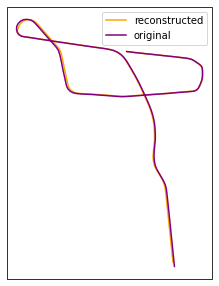

In [17]:
fig, ax = plt.subplots(1, figsize=(5, 5), subplot_kw=dict(projection=EuroPP()))
f.plot(ax, c="orange", label="reconstructed")
flight.plot(ax, c="purple", label="original")
ax.legend()